In [1]:
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In c:\python\python37-64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In c:\python\python37-64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\python\python37-64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In c:\python\python37-64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\python\python37-64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
import matplotlib as mpl

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('experiment1.csv').reset_index(drop=True)

In [6]:
df = df.replace(to_replace=r'm', value='', regex=True)
df = df.replace(to_replace=r'p4py', value='pm4py', regex=True)
df["MEMORY Limit"] = pd.to_numeric(df["MEMORY Limit"])

In [7]:
df_tmp = df[df['Analysis']=='pm4py'][['CPU Limit', 'MEMORY Limit', 'Loading Time', 'DFG Calculation Time', 'Total Time']]

In [8]:
x = df_tmp.iloc[:,0].unique()

In [9]:
y = df_tmp.iloc[:,1].unique()

In [10]:
nx = len(x)
ny = len(y)

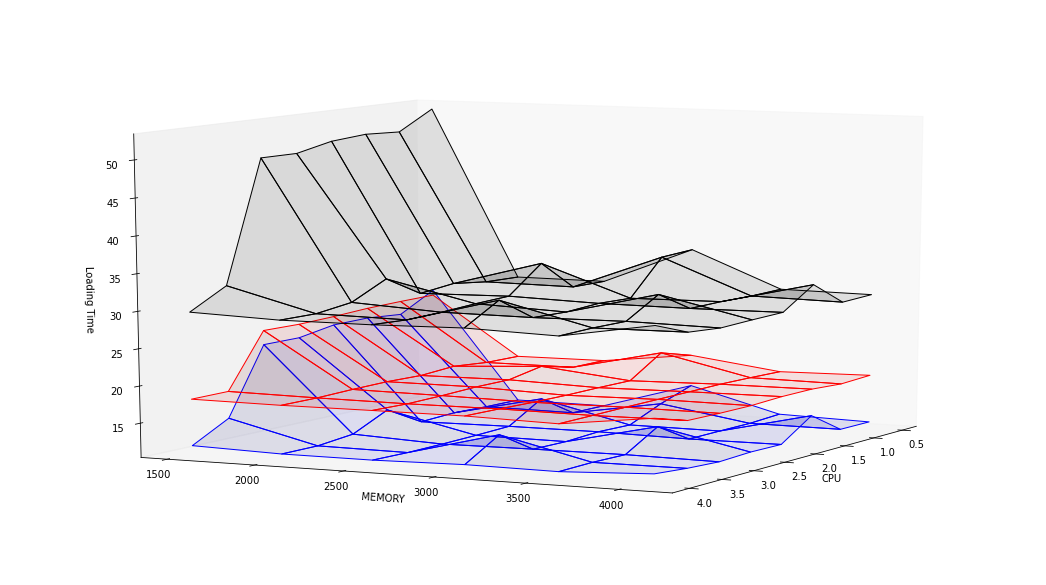

In [11]:
X, Y = np.meshgrid(x, y)
Z1 = df_tmp.iloc[:,2].values.reshape(ny, nx)
Z2 = df_tmp.iloc[:,3].values.reshape(ny, nx)
Z3 = df_tmp.iloc[:,4].values.reshape(ny, nx)

# Create matplotlib Figure and Axes
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z1, color = 'red', zorder = 90, alpha = 0.1, edgecolors='r')
ax.plot_surface(X, Y, Z2, color = 'blue', zorder = 100, alpha = 0.1, edgecolors='b')
ax.plot_surface(X, Y, Z3, color = 'black', zorder = 100, alpha = 0.1, edgecolors='k')


ax.set_xlabel('CPU')
ax.set_ylabel('MEMORY')
ax.set_zlabel('Loading Time')

ax.view_init(10, 27)


ax.grid(False)

plt.show()

In [12]:
fig.savefig("dfgComputation.png")

In [13]:
df_tmp = df[['Analysis', 'CPU Limit', 'MEMORY Limit', 'Total Time']]
df_tmp = pd.DataFrame(pd.pivot_table(df_tmp, values='Total Time', index=['CPU Limit', 'MEMORY Limit'], columns=['Analysis'], aggfunc=np.sum).to_records())

In [14]:
#cpu
x = df_tmp.iloc[:,0].unique()

In [15]:
#memory
y = df_tmp.iloc[:,1].unique()

In [16]:
nx = len(x)
ny = len(y)

c:\python\python37-64\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  if sys.path[0] == '':
No handles with labels found to put in legend.


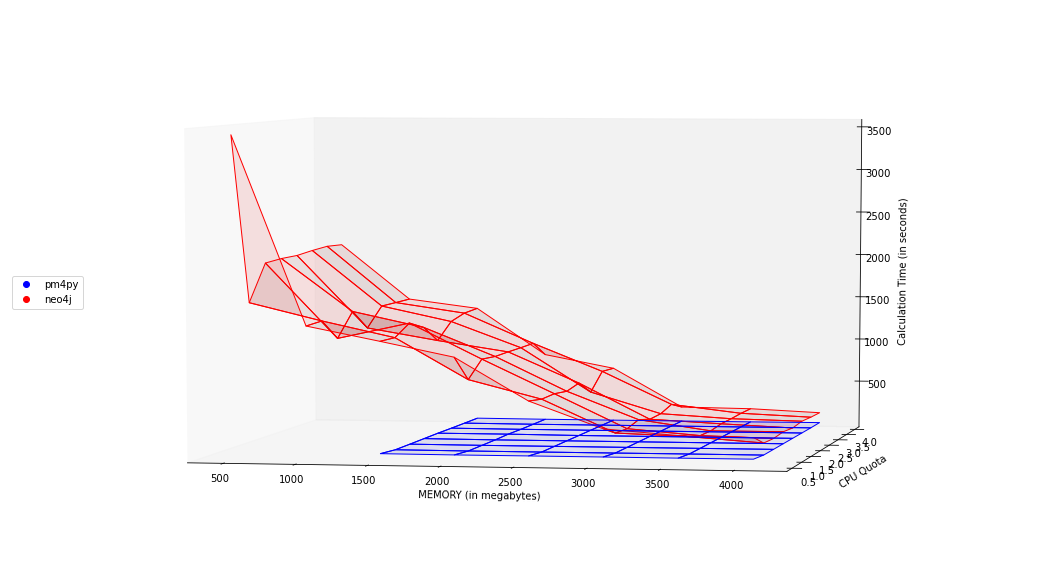

In [17]:
X, Y = np.meshgrid( y, x)
Z1 = df_tmp.iloc[:,2].values.reshape(nx, ny)
Z2 = df_tmp.iloc[:,3].values.reshape(nx, ny)

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z1, color = 'red', zorder = 90, alpha = 0.1, edgecolors='r')
ax.plot_surface(X, Y, Z2, color = 'blue', zorder = 100, alpha = 0.1, edgecolors='b')


ax.set_xlabel('\n MEMORY (in megabytes)')
ax.set_ylabel('\n CPU Quota')
ax.set_zlabel('\n Calculation Time (in seconds)')

ax.view_init(5, 280)


ax.grid(False)

ax.legend()


fake2Dline = mpl.lines.Line2D([0],[0], 
                          linestyle="none", 
                          c='b',
                          marker='o') # fake line for making the legend for surface

fake2Dline2 = mpl.lines.Line2D([0],[0], 
                          linestyle="none", 
                          c='r',
                          marker='o') # fakeline for making the legend for surface
ax.legend([fake2Dline,fake2Dline2], 
          ['pm4py','neo4j'],
          loc=6)

plt.show()

In [18]:
fig.savefig("experiment1.png")

df_no_cpu = df[df['CPU Limit']==2.0][['MEMORY Limit', 'Total Time']]

x_ncpu = df_no_cpu.iloc[:,0]
y_ncpu = df_no_cpu.iloc[:,1]

plt.plot(x_ncpu,y_ncpu, label='PM4PY')
plt.xlabel('memory')
plt.ylabel('time')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()